In [1]:
import pandas as pd
import numpy as np
import os


languages = ['en', 'fr', 'nl', 'es', 'ru', 'ja', 'zh', 'ko', 'vi', 'el', 'bn', 'ceb', 'hu', 'he', 'tr', 'mr', 'war', 'tl', 'sw', 'pa', 'mg', 'yo', 'ilo']
models = ['mbert_base', 'xlm_base', 'xlmr_base']
parts = ['single', 'all', 'multi']
decoding_types = ['default', 'confidence']

base_path = '../X-FACTR/experiments'

# experiments that still have to be run
missing_experiments = []

baseline_results = []


# multi-lang model results
for part in parts:
    for decoding_type in decoding_types:
        for lang in languages:
            for model in models:
                path = f'{base_path}/{part}/{decoding_type}/{model}/{lang}.csv'
                
                if os.path.exists(path):
                    df = pd.read_csv(path)
                    try:
                    
                        acc = df['acc']
                    # for some reason some languages saved without columns
                    except KeyError:
                        df.columns = ['relation', 'acc', 'acc_ori', 'len_acc', 'len_acc_ori', 'prompt'] 
                        acc = df['acc']    
                    baseline_results.append({'language': lang, 'model':model, 'decoding_type':decoding_type, 'part':part, 'acc':np.mean(df['acc']), 'len_acc':np.mean(df['len_acc'])})
                else:                        
                    missing_experiments.append({'language':lang, 'model':model, 'part':part, 'decoding_type':decoding_type})

# lang specific model results
lang_specific_models = {'en':'bert_base', 'el':'el_bert_base', 'es':'es_bert_base','fr':'fr_roberta_base', 'nl':'nl_bert_base','tr':'tr_bert_base','zh':'zh_bert_base'}
for lang in lang_specific_models:
    for decoding_type in decoding_types:
        for part in parts:
            model_name = lang_specific_models[lang]
            path = f'{base_path}/{part}/{decoding_type}/{model_name}/{lang}.csv'
            if os.path.exists(path):
                df = pd.read_csv(path)
                try:
                
                    acc = df['acc']
                # for some reason some languages saved without columns
                except KeyError:
                    df.columns = ['relation', 'acc', 'acc_ori', 'len_acc', 'len_acc_ori', 'prompt'] 
                    acc = df['acc']    
                baseline_results.append({'language': lang, 'model':model_name, 'decoding_type':decoding_type, 'part':part, 'acc':np.mean(df['acc']), 'len_acc':np.mean(df['len_acc'])})
            else:                        
                missing_experiments.append({'language':lang, 'model':model_name, 'part':part, 'decoding_type':decoding_type})


missing_df = pd.DataFrame.from_dict(missing_experiments)
baseline_results_df = pd.DataFrame.from_dict(baseline_results)

In [2]:
# results that obtained 0 accuracy and len_acc -> may be bugged --> check these
zero_acc_df = baseline_results_df[(baseline_results_df['acc']==0) & (baseline_results_df['len_acc']==0)]
zero_acc_df

,language,model,decoding_type,part,acc,len_acc
106,hu,xlm_base,confidence,single,0.0,0.0
137,ilo,xlmr_base,confidence,single,0.0,0.0


In [3]:
# remove potential duplicates
baseline_results_df = baseline_results_df.groupby(['language', 'model', 'part', 'decoding_type']).agg({'acc':'mean', 'len_acc':'mean'})

In [4]:
# check that all results are obtained
missing_df

""


In [5]:
baseline_results_df = baseline_results_df.reset_index()
baseline_results_df

,language,model,part,decoding_type,acc,len_acc
0,bn,mbert_base,all,confidence,0.005447,0.092419
1,bn,mbert_base,all,default,0.002658,0.033956
2,bn,mbert_base,multi,confidence,0.005447,0.092207
3,bn,mbert_base,multi,default,0.000542,0.023763
4,bn,mbert_base,single,confidence,0.000000,0.089753
...,...,...,...,...,...,...
451,zh,zh_bert_base,all,default,0.061083,0.206392
452,zh,zh_bert_base,multi,confidence,0.064354,0.201258
453,zh,zh_bert_base,multi,default,0.060780,0.204153
454,zh,zh_bert_base,single,confidence,0.005997,0.044666


In [6]:
# sort the languages in the same way they are ordered in X-FACTR paper: high resource to low resources
baseline_results_df['order_languages'] = baseline_results_df['language'].apply(lambda x: languages.index(x))
baseline_results_df = baseline_results_df.sort_values(by='order_languages')
baseline_results_df = baseline_results_df.drop(columns=['order_languages'])
baseline_results_df


,language,model,part,decoding_type,acc,len_acc
66,en,mbert_base,all,confidence,0.064570,0.203030
60,en,bert_base,all,confidence,0.076252,0.221069
61,en,bert_base,all,default,0.103886,0.268650
62,en,bert_base,multi,confidence,0.007335,0.197234
63,en,bert_base,multi,default,0.000721,0.115207
...,...,...,...,...,...,...
171,ilo,mbert_base,multi,default,0.001351,0.058601
170,ilo,mbert_base,multi,confidence,0.000416,0.091965
169,ilo,mbert_base,all,default,0.011822,0.136276
185,ilo,xlmr_base,single,default,0.000121,0.288602


In [7]:
baseline_results_df_mbert_base = baseline_results_df[(baseline_results_df['model'] == 'mbert_base') & (baseline_results_df['part'] == 'all')]
baseline_results_df_xlm_base = baseline_results_df[(baseline_results_df['model'] == 'xlm_base') & (baseline_results_df['part'] == 'all')]
baseline_results_df_xlmr_base = baseline_results_df[(baseline_results_df['model'] == 'xlmr_base') & (baseline_results_df['part'] == 'all')]
baseline_results_df

,language,model,part,decoding_type,acc,len_acc
66,en,mbert_base,all,confidence,0.064570,0.203030
60,en,bert_base,all,confidence,0.076252,0.221069
61,en,bert_base,all,default,0.103886,0.268650
62,en,bert_base,multi,confidence,0.007335,0.197234
63,en,bert_base,multi,default,0.000721,0.115207
...,...,...,...,...,...,...
171,ilo,mbert_base,multi,default,0.001351,0.058601
170,ilo,mbert_base,multi,confidence,0.000416,0.091965
169,ilo,mbert_base,all,default,0.011822,0.136276
185,ilo,xlmr_base,single,default,0.000121,0.288602


In [8]:
# merge all language_specific under model name lang_specific
mask = baseline_results_df['model'].isin(['bert_base', 'el_bert_base', 'es_bert_base', 'fr_roberta_base', 'nl_bert_base', 'tr_bert_base', 'zh_bert_base'])
lang_specific_df = baseline_results_df[mask]
lang_specific_df = lang_specific_df[lang_specific_df['part'] == 'all']
lang_specific_df['model'] = 'lang_specific'
lang_specific_df.language = lang_specific_df.language.astype('category')
lang_specific_df.language = lang_specific_df.language.cat.set_categories(languages)

# add 0 acc entries for the languages that do not have a language specific model (to avoid errors when plotting)
for lang in languages:
	if lang not in list(lang_specific_df['language']):
		default_row = pd.Series({'language': lang, 'model':'lang_specific', 'decoding_type':'default', 'part':'all', 'acc':0, 'len_acc':0})
		confidence_row = pd.Series({'language': lang, 'model':'lang_specific', 'decoding_type':'confidence', 'part':'all', 'acc':0, 'len_acc':0})
		lang_specific_df = lang_specific_df.append(default_row, ignore_index=True)
		lang_specific_df = lang_specific_df.append(confidence_row, ignore_index=True)
		
lang_specific_default_df = lang_specific_df[lang_specific_df['decoding_type'] == 'default']
lang_specific_confidence_df = lang_specific_df[lang_specific_df['decoding_type'] == 'confidence']
lang_specific_df

,language,model,part,decoding_type,acc,len_acc
0,en,lang_specific,all,confidence,0.076252,0.221069
1,en,lang_specific,all,default,0.103886,0.268650
2,fr,lang_specific,all,default,0.048706,0.222831
3,fr,lang_specific,all,confidence,0.026296,0.186238
4,nl,lang_specific,all,default,0.055424,0.231923
5,nl,lang_specific,all,confidence,0.040901,0.181315
6,es,lang_specific,all,default,0.061973,0.254815
7,es,lang_specific,all,confidence,0.048884,0.186736
8,zh,lang_specific,all,confidence,0.064396,0.200950
9,zh,lang_specific,all,default,0.061083,0.206392


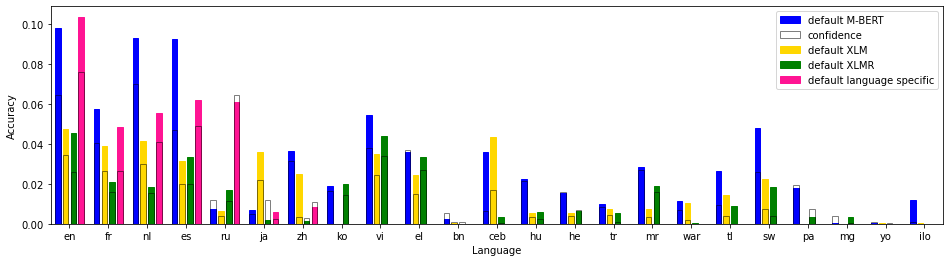

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# FIGURE 3: ALL FACTS
# FIGURE 4: SINGLE TOKEN, MULTI TOKEN
mbert_default_df = baseline_results_df_mbert_base[baseline_results_df_mbert_base['decoding_type'] == 'default']
mbert_default_df.language = mbert_default_df.language.astype('category') 
mbert_default_df.language = mbert_default_df.language.cat.set_categories(languages)

mbert_confidence_df = baseline_results_df_mbert_base[baseline_results_df_mbert_base['decoding_type'] == 'confidence']
mbert_confidence_df.language = mbert_confidence_df.language.astype('category') 
mbert_confidence_df.language = mbert_confidence_df.language.cat.set_categories(languages)

xlm_base_default_df = baseline_results_df_xlm_base[baseline_results_df_xlm_base['decoding_type'] == 'default']
xlm_base_default_df.language = xlm_base_default_df.language.astype('category') 
xlm_base_default_df.language = xlm_base_default_df.language.cat.set_categories(languages)

xlm_base_confidence_df = baseline_results_df_xlm_base[baseline_results_df_xlm_base['decoding_type'] == 'confidence']
xlm_base_confidence_df.language = xlm_base_confidence_df.language.astype('category') 
xlm_base_confidence_df.language = xlm_base_confidence_df.language.cat.set_categories(languages)

xlmr_base_default_df = baseline_results_df_xlmr_base[baseline_results_df_xlmr_base['decoding_type'] == 'default']
xlmr_base_default_df.language = xlmr_base_default_df.language.astype('category') 
xlmr_base_default_df.language = xlmr_base_default_df.language.cat.set_categories(languages)

xlmr_base_confidence_df = baseline_results_df_xlmr_base[baseline_results_df_xlmr_base['decoding_type'] == 'confidence']
xlmr_base_confidence_df.language = xlmr_base_confidence_df.language.astype('category') 
xlmr_base_confidence_df.language = xlmr_base_confidence_df.language.cat.set_categories(languages)

x = np.arange(len(mbert_default_df['language']))*1.25
width = 0.18

plt.figure(figsize=(16,4))
plt.bar(x-0.375, mbert_default_df['acc'], width=width, label='default M-BERT', color='blue', edgecolor='blue')
plt.bar(x-0.375, mbert_confidence_df['acc'], width=width, label='confidence', edgecolor='black', color='none', alpha=0.5)

plt.bar(x-0.125, xlm_base_default_df['acc'], width=width, label='default XLM', color='gold', edgecolor='gold')
plt.bar(x-0.125, xlm_base_confidence_df['acc'], width=width, edgecolor='black', color='none', alpha=0.5)

plt.bar(x+0.125, xlmr_base_default_df['acc'], width=width, label='default XLMR', color='green', edgecolor='green')
plt.bar(x+0.125, xlmr_base_confidence_df['acc'], width=width, edgecolor='black', color='none', alpha=0.5)

plt.bar(x+0.375, lang_specific_default_df['acc'], width=width, label='default language specific', color='deeppink', edgecolor='deeppink')
plt.bar(x+0.375, lang_specific_confidence_df['acc'], width=width, edgecolor='black', color='none', alpha=0.5)

plt.xticks(x, mbert_default_df['language'])
plt.xlabel('Language')
plt.ylabel('Accuracy')
plt.legend()
plt.margins(x=0.005)
plt.show()
